# ELE510 Image Processing and Computer Vision: LAB, Exercise 1, Fundamentals and Image Formation.

**Purpose:** *To learn some basic operations on images using Python, OpenCV and other packages. The emphasis is on the fundamentals of digital images.*

Read the text carefully before starting the work. In many cases it is necessary to do some preparations before you start the work on the computer. Read the necessary theory and answer the theoretical part first. The theoretical and experimental part should be solved individually. The notebook must be approved by the lecturer or the teaching assistants. 

The theory for this exercise can be found in chapters 1 and 2 of the textbook [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentation for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

## Note regarding the notebook

- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`. You can also attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the notebook:

- As markdown:

    `![image name]("image_path")`

    or

    `<img src="image_path" alt="Alt text" title="Title text" />`

- As Python display (recommended for exporting to PDF):


```Python
from IPython.display import Image, display

display(Image(filename='...'))
```

## Problem 1

**a)** What does a pixel value represent? What is the standard bit depth and why is it the common practice?

- A pixel represents smallest unit of an image. Almost the same as atom is to matter. 
- Standard depth is 8 bits per channel.
- Saving memory while keeping enough detail and colors.

**b)** What is the difference between image processing and image analysis? What primary problems are they trying to solve?

- In processing we are making changes to the image to prepare it, to make it suitable for model training or other tasks. 
- In analysis we are trying to retrieve information from the image.

**c)** What is the meaning of the abbreviation PSF? What does the PSF specify?

Point spread function shows how a imaging system spreads out / blurs the light source. 

**d)** Explain how a Bayer filter works. What is the alternative to using this type of filter in image acquisition?

In bayer filter rather than spliting the ligh and sending them to three different image planes, we create an image plane in which each pixel has its own color filter which could be red, blue or green. 

- (r,2g,b)/4
- in bayer filter green has twice the amount of pixels.
- human eye is more sensitive to green.

Alternatives 3CCSD/3CMOS = Uses a trichoric prism to split light into three different colors and its recieved by its respective image plane.

**e)** Briefly explain the following concepts: Sampling, Quantization, Gamma Compression.

It all starts with Erradiance so i will explain it first.

**Erradiance:** Intensity of light for each color. 

- E(x,y,lambda) => illumination(x,y,lambda) x color(x,y,lambda)
- here lambda = color / texture
- x,y being the location

**Image Acquisition:** how is Erradiance turned into pixel values?

- I(x,y) = ///E(x',y',lambda') s(lambda') dx'dy'dlambda'
- each pixel dx'dy' and color dlabmda'
- s(lambda') is sensor sensitivty

**Sampling:** Continuous light/erradiance converted into discrete values.

- light is continuous
- sensor samples it -> breaks it into x,y
- each pixel one measurement of light

**Quantization:** Camera must store the measurement as a number. 0-255

**Gamma Compression:** Allocate more bits to dark than white because human eye is more sensitive to dark. We use non linear mapping to do it.

## Problem 2

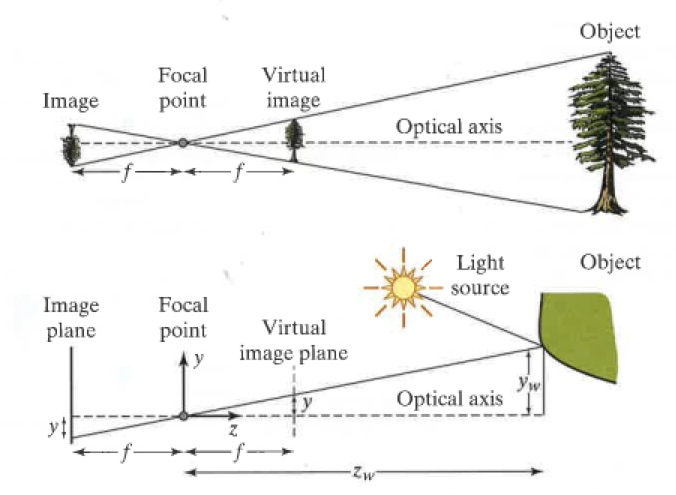

In [1]:
from IPython.display import Image, display

# Display the image
display(Image(filename='./perspectiveProjection.jpg'))

Assume we have captured an image with a digital camera pointed towards a wall such that the distance is approximately constant over the whole image plane (*weak perspective*, see Figure 1). The image covers an area in the scene of size $2.048\text{m} \times 1.536\text{m}$. The camera has 4096 pixels horizontally, and 3072 pixels vertically. The active region on the CCD-chip is $10\text{mm} \times 7.5\text{mm}$. We define the spatial coordinates $(x_w,y_w)$ such that the origin is at the center of the optical axis, x-axis horizontally and y-axis vertically upwards. The image indexes $(x,y)$ is starting in the upper left corner. The solutions to this problem can be found from simple geometric considerations. 

**Note**

We talk about $(x_w,y_w)$ when we refer to the spatial/world/scene coordinates.

We talk about $(x,y)$ when we refer to the image plane or image coordinates, i.e., the CCD-chip.

Answer the following questions:

**a)** What is the focal length of the camera considering that the image was capture at 3.072 meters of distance?

15mm

**b)** What is the distance between pixels? And between the world points? Give both answers in milimiters per pixel.

distance between pixels = 0.002441 mm/px

between world points = 0.5 mm/px

**c)** What is the scaling coefficient between the image plane (CCD-chip) and the scene coordinates? What is the scaling coefficient between the pixels of the image and  scene coordinates?

CCD - scene => 1 mm on chip=204.8 mm in scene

pixel - scene => 0.5 mm/px

## Problem 3

Translation from the scene (in meters) to a camera sensor (in pixels) can be done using a transformation matrix, $T$. 

\begin{equation}
    \left[
	\begin{array}{c}x \\ y \\ 1\end{array}\right] = 
	T\left[
	\begin{array}{ccc}
		x_w\\ y_w\\ 1
	\end{array} \right]
\end{equation}

where

\begin{equation}
	T= \left[\begin{array}{ccc} s_x & 0 & x_0\\
			0 & s_y & y_0\\
		0   & 0 & 1
	\end{array} \right]
\end{equation}
$s_x$ and $s_y$ are the scaling factors between the pixels and the scene coordinates for their corresponding axes.

Write a function in Python that computes the image points using the transformation matrix, using the parameters from Problem 2. Let the input to the function be a set of $K$ scene points, given by a $2 \times K$ matrix, and the output of the resulting image points also given by a $2 \times K$ matrix. The size of the image sensor in number of pixels and the size of the area in the scene covered by the image will also be used as input parameters. For simplicity, let the optical axis $(x_0,y_0)$ meet the image plane at the middle point (in pixels).

Test the function for the following input points (in meters) given as a matrix:
\begin{equation}
    {\mathbf P}_{in} = \left[\begin{array}{ccccccccc} 
    1.024 & -1.024 & -1.024 & 1.024 & 0 & -0.35 & 0.35 & 0.3 & 1.2\\
    0.768 & 0.768 & -0.768 & -0.768 & 0 & 0.15 & -0.15 & -0.9 & 0\end{array}\right]
\end{equation}

<div class="alert alert-block alert-info">
Comment on the results, especially notice the two last points!
</div>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

"""
Function that takes in input:
- scene_size: size of the area in the scene covered by the image,
- n_pixels: number of pixels in the image,
- p_scene: K input points (2xK matrix)

and return the resulting image points given the 2xK matrix
"""
def weakPerspective(scene_size, n_pixels, p_scene):
    scene_w_m, scene_h_m = scene_size
    Wpx, Hpx = n_pixels
    x_0 = Wpx / 2.0
    y_0 = Hpx / 2.0
        
    # Scaling factor (between image pixels and the scene coordinates)
    s_x = Wpx / scene_w_m
    s_y = - Hpx / scene_h_m
    
    T = np.array([[s_x, 0.0, x_0],
                  [0.0, s_y, y_0],
                  [0.0, 0.0, 1.0]], dtype=float)

    # Auxilar element for the last row
    K = p_scene.shape[1]
            
    # Just take the 2 first row from the multiplication since last row is all ones
    return np.matmul(T, np.concatenate((p_scene, np.ones((1,K))), axis=0))[0:2]
    

In [5]:
# The above function is then called using the following parameters:

# Parameters
scene_size = (2.048, 1.536)
n_pixels = (4096, 3072) 
p_scene_x = np.array([ 1.024, -1.024, -1.024,  1.024,  0.0, -0.35, 0.35, 0.3, 1.2 ], dtype=float)
p_scene_y = np.array([ 0.768,  0.768, -0.768, -0.768,  0.0,  0.15,-0.15,-0.9, 0.0 ], dtype=float)

In [6]:
####
# This cell is locked; it can be only be executed to see the results. 
####
# Input data:
p_scene = np.array([p_scene_x, p_scene_y])

# Call to the weakPerspective() function 
pimage = weakPerspective(scene_size, n_pixels, p_scene)

# Result: 
print(pimage)

[[4096.    0.    0. 4096. 2048. 1348. 2748. 2648. 4448.]
 [   0.    0. 3072. 3072. 1536. 1236. 1836. 3336. 1536.]]


<div class="alert alert-block alert-info">
Comment on the results, especially notice the two last points!
</div>

points outside the scene rectangle are producing pixel outside the sensor 

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistants
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no



## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.